In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/README.md.txt
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-173.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-334.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-309.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-487.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-178.png
/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/Tuberculosis-10.png
/kaggle/input/tuberculos

In [5]:
!pip install mplcyberpunk
!pip install split-folders

In [8]:

import splitfolders
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D, Activation

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [9]:
base_path = r'/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/'
base_path = pathlib.Path(base_path)
base_path

PosixPath('/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database')

In [10]:
splitfolders.ratio(base_path, output='X_ray_Imgs', seed=123, ratio=(0.7, 0.15, 0.15),
                  group_prefix=None)

Copying files: 4200 files [00:39, 106.14 files/s]


In [11]:
# necessary libraries
import os
import pandas as pd

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

from glob import glob
import os
import numpy as np
import pandas as pd
import random
from skimage.io import imread

import matplotlib.pyplot as plt
%matplotlib inline

from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, GlobalMaxPooling2D

In [12]:
batch_size = 20
img_height, img_width = 200, 200
input_shape = (img_height, img_width, 3)

datagen= ImageDataGenerator(rescale=1/255)

train_data = datagen.flow_from_directory('X_ray_Imgs/train', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', subset='training')

test_data = datagen.flow_from_directory('X_ray_Imgs/test', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

val_data = datagen.flow_from_directory('X_ray_Imgs/val/', target_size=(200, 200),
                                      batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 2939 images belonging to 2 classes.
Found 631 images belonging to 2 classes.
Found 630 images belonging to 2 classes.


In [13]:
class_name=train_data.class_indices

class_names=list(class_name.keys())
class_name

{'Normal': 0, 'Tuberculosis': 1}

In [14]:
num_classes=2
model = Sequential()
model.add(ResNet50(input_shape=(200,200,3),include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 4s 0us/step


In [15]:
history= model.fit(train_data,
                   steps_per_epoch= train_data.samples//train_data.batch_size,
                   validation_data= val_data,
                   validation_steps= val_data.samples//val_data.batch_size,
                   epochs= 10,
                   verbose=1 
                  )

Epoch 1/10
146/146 [==============================] - 208s 1s/step - loss: 0.1586 - accuracy: 0.9432 - val_loss: 0.8671 - val_accuracy: 0.1597
Epoch 2/10
146/146 [==============================] - 204s 1s/step - loss: 0.0789 - accuracy: 0.9805 - val_loss: 0.8073 - val_accuracy: 0.8484
Epoch 3/10
146/146 [==============================] - 204s 1s/step - loss: 0.0657 - accuracy: 0.9818 - val_loss: 1.3332 - val_accuracy: 0.8532
Epoch 4/10
146/146 [==============================] - 203s 1s/step - loss: 0.0551 - accuracy: 0.9853 - val_loss: 1.1884 - val_accuracy: 0.6839
Epoch 5/10
146/146 [==============================] - 206s 1s/step - loss: 0.0510 - accuracy: 0.9856 - val_loss: 1.7389 - val_accuracy: 0.3065
Epoch 6/10
146/146 [==============================] - 205s 1s/step - loss: 0.0491 - accuracy: 0.9884 - val_loss: 2.1568 - val_accuracy: 0.2145
Epoch 7/10
146/146 [==============================] - 203s 1s/step - loss: 0.0431 - accuracy: 0.9887 - val_loss: 1.6747 - val_accuracy: 0.2823

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

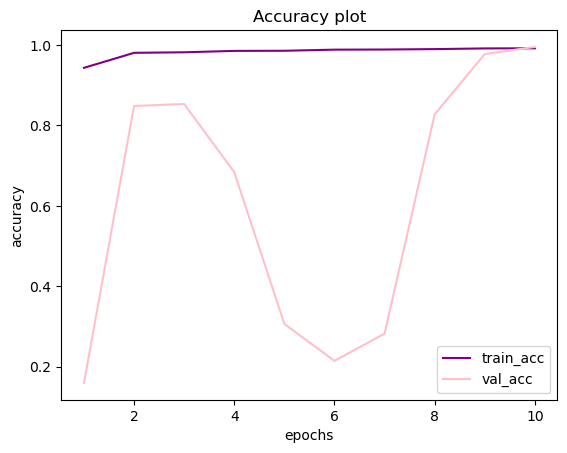

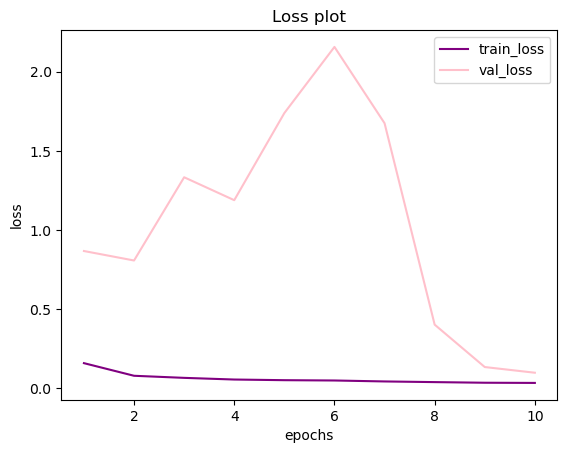

In [18]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [19]:
import numpy as np
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=1)
prediction= (prediction > 0.5)
prediction

32/32 [==============================] - 35s 1s/step


array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [20]:
val_labels=val_data.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
pred1=[i[0] for i in prediction]
pred2=[i[1] for i in prediction]

0.9952380952380953
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       0.99      0.98      0.99       105

    accuracy                           1.00       630
   macro avg       0.99      0.99      0.99       630
weighted avg       1.00      1.00      1.00       630



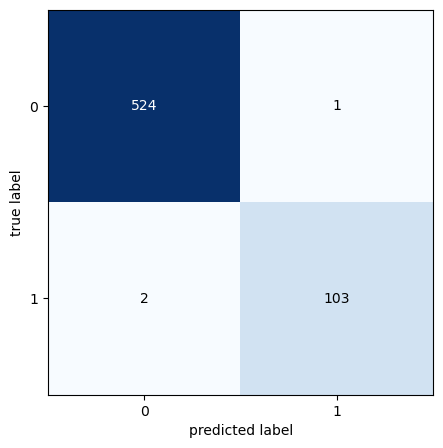

In [23]:
cm= confusion_matrix(val_data.classes, pred2)
plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, pred2))
print(classification_report(val_data.classes, pred2))

In [24]:
from sklearn import metrics
# Creating the confusion matrix
cm = metrics.confusion_matrix(val_data.classes, pred2)
# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,524,1
Actual Positive,2,103


In [25]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
confusion_metrics(cm)

True Positives: 103
True Negatives: 524
False Positives: 1
False Negatives: 2
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 0.98
Specificity: 1.0
Precision: 1.0
f_1 Score: 0.99


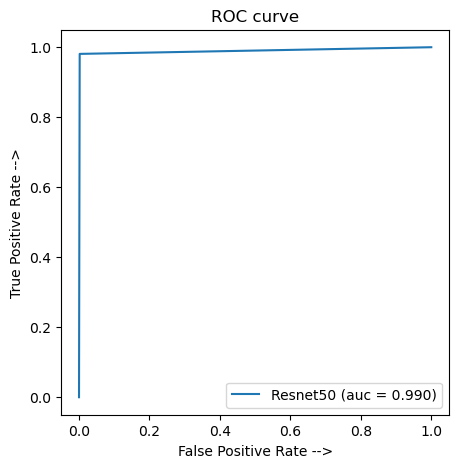

In [26]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(val_data.classes, pred2)
auc_resnet = auc(fpr, tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='Resnet50 (auc = %0.3f)' % auc_resnet)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.title("ROC curve")
plt.show()